In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for legend handle

In [3]:
merged = pd.read_csv("../merged_data.csv")
merged

,Name,Wait Time,Delivery Fee,Link,Delivery Address,GEOID,Countyfp,Blkgrpce,Funcstat,Latitude,...,pct_native,pct_asian,pct_hisp,pct_other,median_income,pct_college,pct_hs_grad,pct_device_access,pct_internet_access,GEOID_tract
0,Philly's Best (Jingletown),NaN,4.99,https://postmates.com/store/phillys-best-jingl...,2236 Linden St Oakland CA,60014016002,1,2,S,37.815860,...,0.0,0.132167,0.103984,0.052478,37450.0,0.438177,0.872934,0.896205,0.775670,6001401600
1,Burger Latino (5333 Adeline St),35–45 min,3.99,https://postmates.com/store/burger-latino-5333...,2236 Linden St Oakland CA,60014016002,1,2,S,37.815860,...,0.0,0.132167,0.103984,0.052478,37450.0,0.438177,0.872934,0.896205,0.775670,6001401600
2,"Philly Fresh Cheesesteaks (5333 Adeline St ,)",35–45 min,3.99,https://postmates.com/store/philly-fresh-chees...,2236 Linden St Oakland CA,60014016002,1,2,S,37.815860,...,0.0,0.132167,0.103984,0.052478,37450.0,0.438177,0.872934,0.896205,0.775670,6001401600
3,Dirty Burger (Oakland),45–55 min,4.99,https://postmates.com/store/dirty-burger-oakla...,2236 Linden St Oakland CA,60014016002,1,2,S,37.815860,...,0.0,0.132167,0.103984,0.052478,37450.0,0.438177,0.872934,0.896205,0.775670,6001401600
4,iLava Hawaiian Barbecue (Adeline),35–45 min,3.99,https://postmates.com/store/ilava-hawaiian-bar...,2236 Linden St Oakland CA,60014016002,1,2,S,37.815860,...,0.0,0.132167,0.103984,0.052478,37450.0,0.438177,0.872934,0.896205,0.775670,6001401600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44011,Loard's Ice Cream,35–45 min,5.49,https://postmates.com/store/loards-ice-cream/7...,9957 Medford Ave Oakland CA,60014093003,1,3,S,37.738119,...,0.0,0.120798,0.454832,0.163866,21622.0,0.140524,0.660092,0.876460,0.681008,6001409300
44012,Rite Aid (1355 Macarthur Blvd),40–50 min,2.99,https://postmates.com/store/rite-aid-1355-maca...,9957 Medford Ave Oakland CA,60014093003,1,3,S,37.738119,...,0.0,0.120798,0.454832,0.163866,21622.0,0.140524,0.660092,0.876460,0.681008,6001409300
44013,OakTown Wings,35–45 min,4.49,https://postmates.com/store/oaktown-wings/dj0V...,9957 Medford Ave Oakland CA,60014093003,1,3,S,37.738119,...,0.0,0.120798,0.454832,0.163866,21622.0,0.140524,0.660092,0.876460,0.681008,6001409300
44014,Wingman,35–45 min,3.49,https://postmates.com/store/wingman/Oi2pmEDCTE...,9957 Medford Ave Oakland CA,60014093003,1,3,S,37.738119,...,0.0,0.120798,0.454832,0.163866,21622.0,0.140524,0.660092,0.876460,0.681008,6001409300


In [5]:
df = pd.read_csv("../csv_intersection.csv")
df

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,msamd,state_code,county_cod,census_tra,geoid_2,tract_prop,holc_prop,map_id,st_name,state
0,6,1,407200,3,60014072003,Block Group 3,G5030,S,154734,0,...,36084,6,1,406500,6001406500,0.834557,0.439197,17.0,Oakland,CA
1,6,1,407200,3,60014072003,Block Group 3,G5030,S,154734,0,...,36084,6,1,407200,6001407200,0.438440,0.998272,17.0,Oakland,CA
2,6,1,407200,3,60014072003,Block Group 3,G5030,S,154734,0,...,36084,6,1,407200,6001407200,0.001746,0.000882,17.0,Oakland,CA
3,6,1,407200,3,60014072003,Block Group 3,G5030,S,154734,0,...,36084,6,1,406500,6001406500,0.003028,0.003991,17.0,Oakland,CA
4,6,1,407200,3,60014072003,Block Group 3,G5030,S,154734,0,...,36084,6,1,407101,6001407101,0.062833,0.016459,17.0,Oakland,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,6,1,428200,4,60014282004,Block Group 4,G5030,S,196378,0,...,36084,6,1,428200,6001428200,0.188344,0.291748,17.0,Oakland,CA
2384,6,1,428200,4,60014282004,Block Group 4,G5030,S,196378,0,...,36084,6,1,428200,6001428200,0.178695,0.873892,17.0,Oakland,CA
2385,6,1,428200,5,60014282005,Block Group 5,G5030,S,204382,0,...,36084,6,1,428100,6001428100,0.536895,0.398372,17.0,Oakland,CA
2386,6,1,428200,5,60014282005,Block Group 5,G5030,S,204382,0,...,36084,6,1,428200,6001428200,0.188344,0.291748,17.0,Oakland,CA


In [6]:
df.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'GEOID', 'NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'holc_id', 'holc_grade', 'id', 'polygon_id', 'sheets', 'name',
       'municipali', 'holc_area', 'year', 'msamd', 'state_code', 'county_cod',
       'census_tra', 'geoid_2', 'tract_prop', 'holc_prop', 'map_id', 'st_name',
       'state'],
      dtype='object')

In [7]:
df[df.GEOID == 60014072003][["GEOID", "geoid_2", "polygon_id", "holc_id", "tract_prop","holc_prop", "holc_grade"]]

,GEOID,geoid_2,polygon_id,holc_id,tract_prop,holc_prop,holc_grade
0,60014072003,6001406500,6722,C22,0.834557,0.439197,C
1,60014072003,6001407200,6748,D14,0.438440,0.998272,D
2,60014072003,6001407200,6722,C22,0.001746,0.000882,C
3,60014072003,6001406500,6720,C20,0.003028,0.003991,C
4,60014072003,6001407101,6722,C22,0.062833,0.016459,C
5,60014072003,6001407200,6720,C20,0.281200,0.355744,C


In [8]:
#For a given GEOID (of a block group), I want to find the worst letter grade

def get_grade(row):
    #Filter main df to just geoids matching the row
    #print(row)
    mini_df = df[df.GEOID == row]
    
    #Get letters associated with that geoid
    values = mini_df['holc_grade'].values
    if 'D' in values:
        return 'D'
    elif 'C' in values:
        return 'C'
    elif 'B' in values:
        return 'B'
    else:
        return 'A'
    


In [9]:
df[df.GEOID == 60014072003]['holc_grade'].values

array(['C', 'D', 'C', 'C', 'C', 'C'], dtype=object)

In [10]:
merged['worst_grade'] = merged['GEOID'].apply(get_grade)

In [12]:
merged.columns

Index(['Name', 'Wait Time', 'Delivery Fee', 'Link', 'Delivery Address',
       'GEOID', 'Countyfp', 'Blkgrpce', 'Funcstat', 'Latitude', 'Longitude',
       'Mtfcc', 'Namelsad', 'Statefp', 'Tractce', 'Aland', 'Awater',
       'Latitude.1', 'Longitude.1', 'Accuracy Score', 'Accuracy Type',
       'Number', 'Street', 'Unit Type', 'Unit Number', 'City', 'State',
       'County', 'Zip', 'Country', 'Source', 'Restaurant Address',
       'Restaurant Latitude', 'Restaurant Longitude', 'Distance', 'NAME_x',
       'B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'tract', 'block group', 'S0601_C01_047E',
       'S1501_C01_006E', 'S1501_C01_014E', 'S1501_C01_015E', 'S2801_C01_001E',
       'S2801_C01_002E', 'S2801_C01_012E', 'pct_white', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hisp', 'pct_other', 'median_i

In [13]:
#Data cleanup per Margo
merged = merged[merged['Distance'] < 25]

## Some Viz

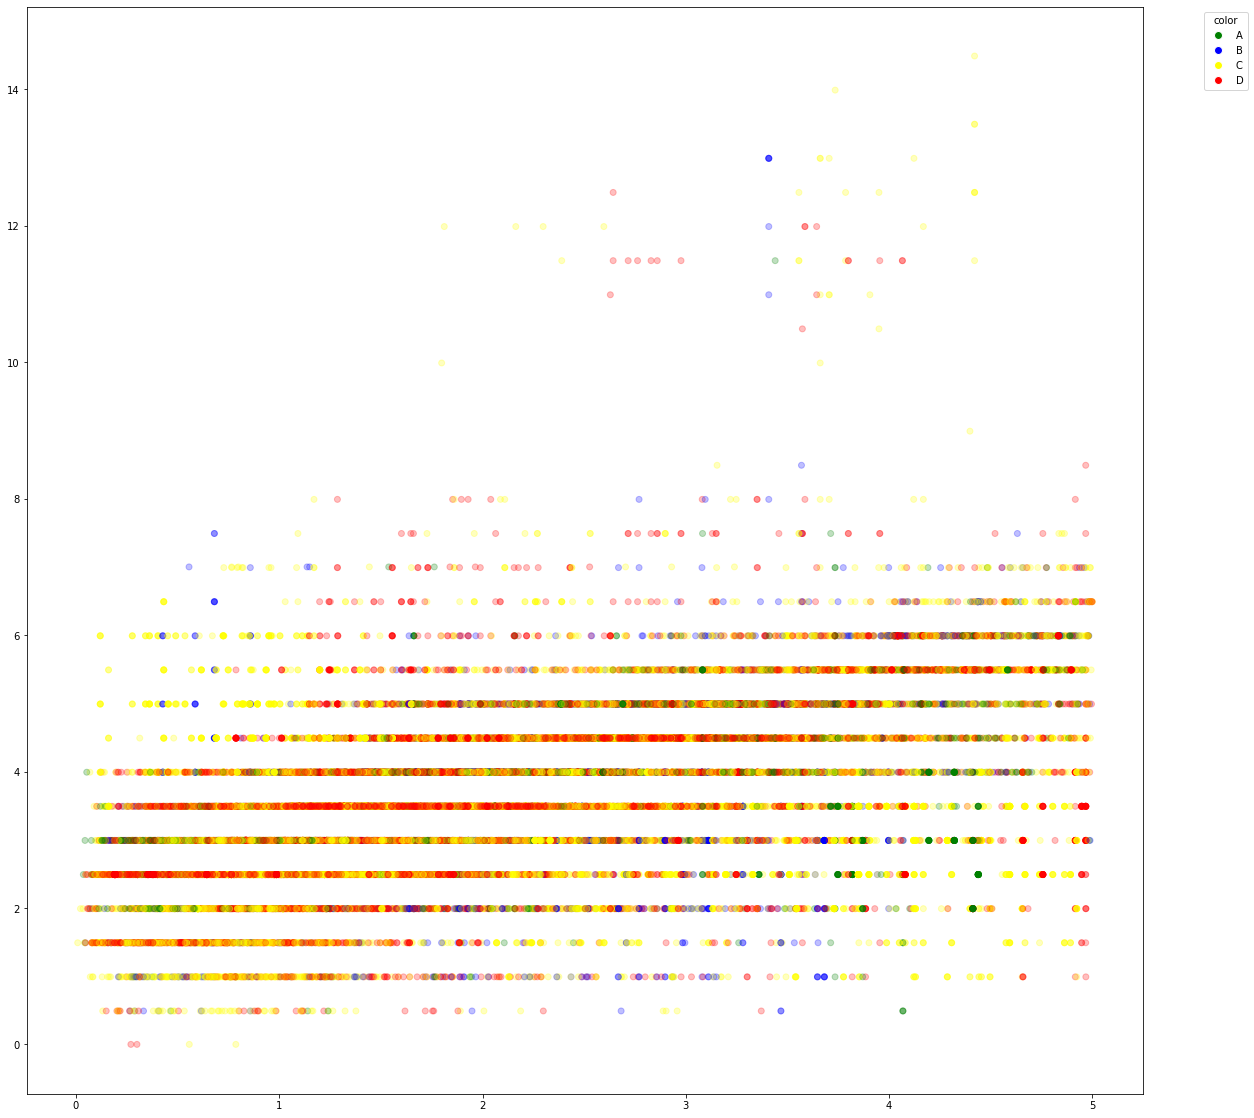

In [14]:
#Filter df to smaller distances?
temp = merged[merged['Distance'] < 5]


colors = {'A': 'green', 'B' : 'blue', 'C' : 'yellow', 'D' : 'red'}

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(temp['Distance'], temp['Delivery Fee'], c=temp['worst_grade'].map(colors), alpha = 0.25)


handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

In [15]:
#Filter out NAs from distance and dlivery fee columns

df_dropped = merged.dropna(subset=['Distance','Delivery Fee'])

In [16]:
a = np.polyfit(df_dropped[df_dropped.worst_grade =='A'].Distance, df_dropped[df_dropped.worst_grade =='A']['Delivery Fee'], deg=1)
a_line = a[1] + a[0] * df_dropped[df_dropped.worst_grade =='A'].Distance


b = np.polyfit(df_dropped[df_dropped.worst_grade =='B'].Distance, df_dropped[df_dropped.worst_grade =='B']['Delivery Fee'], deg=1)
b_line = b[1] + b[0] * df_dropped[df_dropped.worst_grade =='B'].Distance

c = np.polyfit(df_dropped[df_dropped.worst_grade =='C'].Distance, df_dropped[df_dropped.worst_grade =='C']['Delivery Fee'], deg=1)
c_line = c[1] + c[0] * df_dropped[df_dropped.worst_grade =='C'].Distance

d = np.polyfit(df_dropped[df_dropped.worst_grade =='D'].Distance, df_dropped[df_dropped.worst_grade =='D']['Delivery Fee'], deg=1)
d_line = d[1] + d[0] * df_dropped[df_dropped.worst_grade =='D'].Distance



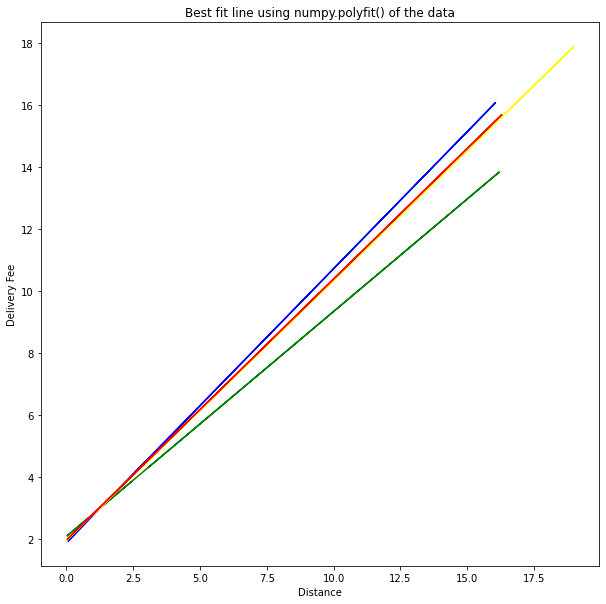

In [17]:
# Plotting the data points and the best fit line

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(df_dropped[df_dropped.worst_grade =='A'].Distance, a_line, 'r', color='green')
plt.plot(df_dropped[df_dropped.worst_grade =='B'].Distance, b_line, 'r', color='blue')
plt.plot(df_dropped[df_dropped.worst_grade =='C'].Distance, c_line, 'r', color='yellow')
plt.plot(df_dropped[df_dropped.worst_grade =='D'].Distance, d_line, 'r', color='red')

ax.set_title('Best fit line using numpy.polyfit() of the data')
ax.set_xlabel('Distance')
ax.set_ylabel('Delivery Fee')

plt.show()

In [95]:
# Cody Start
# Drop columns from df_dropped that don't have a Wait Time
with_wait_time = df_dropped.copy().dropna(subset=['Wait Time'])
# Drop columns where distance is > 25 miles
with_wait_time = with_wait_time[with_wait_time['Distance'] < 25]
# Extract everything before '-' in Wait Time column as new column called 'Min Wait Time'
with_wait_time['Min Wait Time'] =  with_wait_time['Wait Time'].str.split('–').str[0]
# Convert Min Wait Time column to numeric
with_wait_time['Min Wait Time'] = pd.to_numeric(with_wait_time['Min Wait Time'])
# Get mean of Min Wait Time by worst grade
mean_wait_time = with_wait_time.groupby('worst_grade').mean()
mean_wait_time['Min Wait Time']

worst_grade
A    35.970246
B    35.787644
C    34.772694
D    34.372437
Name: Min Wait Time, dtype: float64

First we will test whether there is a statistic difference in the minimum wait time for the groups formed by the worst HOLC grade for each address.

In [96]:
# Run ANOVA on Min Wait Time by worst grade
from scipy.stats import f_oneway
f_oneway(with_wait_time[with_wait_time.worst_grade == 'A']['Min Wait Time'],
 with_wait_time[with_wait_time.worst_grade == 'B']['Min Wait Time'],
  with_wait_time[with_wait_time.worst_grade == 'C']['Min Wait Time'], 
  with_wait_time[with_wait_time.worst_grade == 'D']['Min Wait Time'])

F_onewayResult(statistic=32.86247823131631, pvalue=3.31105555579822e-21)

We find a statistical difference between the groups. However it is in the opposite direction we expect. Let is account for distance in delivery time, creating a new variable for wait time / distance.

worst_grade
A    19.613408
B    18.952003
C    21.525846
D    20.785558
Name: Minutes/Mile, dtype: float64
41698


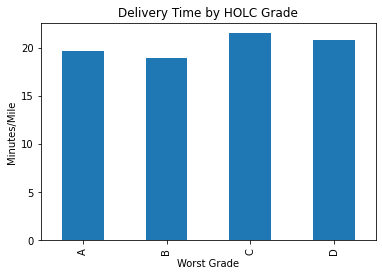

<Figure size 1440x1440 with 0 Axes>

In [108]:
# Create new variable: Minutes / Mile 
with_wait_time['Minutes/Mile'] = with_wait_time['Min Wait Time'] / with_wait_time['Distance']
# Get mean of Minutes/Mile by worst grade
mean_minutes_mile = with_wait_time.groupby('worst_grade').mean()
print(mean_minutes_mile['Minutes/Mile'])
# Bar plot of Minutes/Mile by worst grade
mean_minutes_mile['Minutes/Mile'].plot.bar()
# Add title and labels
plt.title('Delivery Time by HOLC Grade')
plt.xlabel('Worst Grade')
plt.ylabel('Minutes/Mile')
# Increase size of plot
plt.figure(figsize=(20, 20))
print(len(with_wait_time))


In [98]:
# Run ANOVA on Minutes/Mile by worst grade to see if there is a significant difference
from scipy.stats import f_oneway
statistic,pvalue = f_oneway(with_wait_time[with_wait_time.worst_grade == 'A']['Minutes/Mile'], 
with_wait_time[with_wait_time.worst_grade == 'B']['Minutes/Mile'],
 with_wait_time[with_wait_time.worst_grade == 'C']['Minutes/Mile'], 
 with_wait_time[with_wait_time.worst_grade == 'D']['Minutes/Mile'])

In [99]:
print(pvalue)

4.182120545673587e-09


We will now look at race vs the minimum delivery time.

Text(0, 0.5, 'Minutes/Mile')

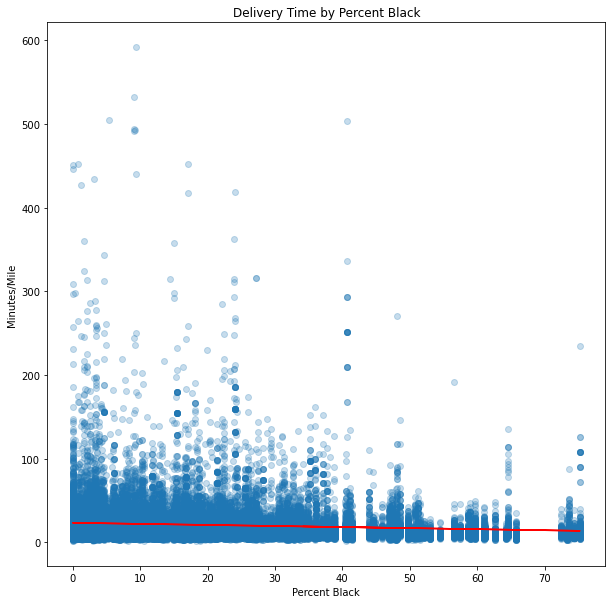

In [147]:
# Remove outliers where minutes/mile is > 750
with_wait_time_outliers = with_wait_time[with_wait_time['Minutes/Mile'] < 750]
# Multiply pct_black by 100 
with_wait_time_outliers['pct_black'] = with_wait_time_outliers['pct_black'] * 100
# Scatterplot of minutes/mile by pct_black
# With fit linear regression line
fig, ax = plt.subplots(figsize=(10, 10))
# Get slope and intercept of linear regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(
    with_wait_time_outliers['pct_black'],
    with_wait_time_outliers['Minutes/Mile']
)
ax.scatter( with_wait_time_outliers['pct_black'],with_wait_time_outliers['Minutes/Mile'], alpha=0.25)

# ADd linear regression line to scatterplot
ax.plot(with_wait_time_outliers['pct_black'], intercept + slope * with_wait_time_outliers['pct_black'], color='red')

ax.set_title('Delivery Time by Percent Black')
ax.set_xlabel('Percent Black')
ax.set_ylabel('Minutes/Mile')

In [148]:
# Print intercept and slope
print(intercept)
print(slope)


23.307702507398197
-0.1269642571456143


In [146]:
# Print p-value
print(p_value)

1.5637827281191214e-79
